# Regression Model Test

## Imports

In [5]:
import tensorflow as tf
from tensorflow import keras
from loadData import createDataset
import matplotlib.pyplot as plt
import numpy as np

In [6]:
model_path = '../../log/saved_models/mtm_classification_np/'
batch_size = 32
image_height = 160
image_width = 160

use_age_groups = False
num_age_classes = 8 if use_age_groups else 122
age_classes_dict = {
    0 : "0-13",
    1 : "14-19",
    2 : "20-29",
    3 : "30-39",
    4 : "40-49",
    5 : "50-59",
    6 : "60+",
    7 : "-"
}

## Load the model

In [7]:
loaded_model = keras.models.load_model(model_path)

## Evaluating the test data

In [8]:
x, y_face, y_mask, y_age = createDataset('../../data/m3/test', (image_height, image_width), for_regression=False)

results = loaded_model.evaluate(
    x, 
    {
        'face_output' : y_face,
        'mask_output' : y_mask,
        'age_output' : y_age
})

print(f'Loss: {results[0]}; Accuracy: {results[1]}')

8/8 [==============================] - 2s 151ms/step - loss: 1.2480 - face_output_loss: 0.5102 - mask_output_loss: 0.5748 - age_output_loss: 1.7183 - face_output_binary_accuracy: 0.8906 - mask_output_binary_accuracy: 0.8945 - age_output_categorical_accuracy: 0.8203
Loss: 1.248006820678711; Accuracy: 0.5102307796478271


## Predict new images

1/1 [==============================] - 0s 27ms/step


Text(0.5, 1.0, 'Face: 0.51% | Mask: 0.40% | Age: - (Actual: 42)')

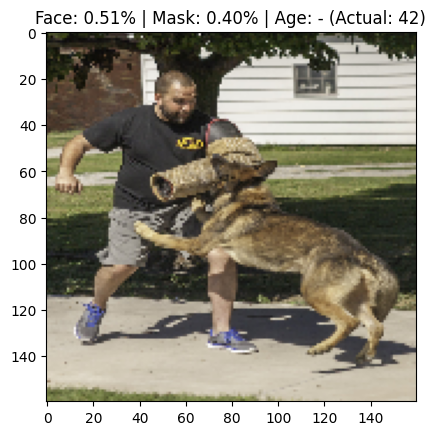

In [10]:
# Getting the image path for image to predict
img_path = '../../data/m3/test/face/noMask/1_0_14_200000.jpg'
img_path_split = img_path.split('/')
img_name = img_path_split[len(img_path_split)-1]
img_name_split = img_name.split('_')

# Getting the actual age from the file name
if(len(img_name_split) > 2 and str.isnumeric(img_name_split[2])):
    age_actual = img_name_split[2]
else:
    age_actual = '?'

# Loading and preprocessing the image
img = tf.keras.utils.load_img(
    img_path, target_size=(image_height, image_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array_batch = tf.expand_dims(img_array, 0) # Create a batch

# Let the model make a prediction for the image
preds = loaded_model.predict(img_array_batch)

# Getting face, mask and age prediction
face_pred_percent = preds[0][0][0]*100
mask_pred_percent = preds[1][0][0]*100
age_preds = preds[2][0]
age_output_indexes = np.array([i for i in range(0, num_age_classes)])
avg_age_pred = int(np.sum(age_preds * age_output_indexes))

if use_age_groups:
    age_pred = age_classes_dict[np.argmax(age_preds)]
else:
    age_pred = str(np.argmax(age_preds))
    if age_pred == "121": age_pred = "-"

# Showing the image with the corresponding predictions
ax = plt.subplot(1, 1, 1)
plt.imshow(img)
plt.title("Face: {:.2f}% | Mask: {:.2f}% | Age: {} (Actual: {})".format(face_pred_percent, mask_pred_percent, age_pred, age_actual))